In [27]:
import os
os.environ['JAX_PLATFORMS'] = ''

from os import listdir
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from cv2 import imread, imshow, resize
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [28]:
base_path = "E:/UDA_LEARNING/UDA_DO AN TRI TUE NHAN TAO & UNG DUNG/BREAST CANCER/data/IDC_regular_ps50_idx5"
test_data = "E:/UDA_LEARNING/UDA_DO AN TRI TUE NHAN TAO & UNG DUNG/BREAST CANCER/data/IDC_regular_ps50_idx5/16551"

folder = listdir(base_path)
len(folder)
print(folder[:5])

['10253', '10254', '10255', '10256', '10257']


In [30]:
import glob
print(len(glob.glob(test_data + '/*/*')))

2183


In [31]:
# how many image input?
total_images = 0
for n in range(len(folder)):
    patient_id = folder[n]
    for c in [0, 1]:
        patient_path = base_path + "/" + patient_id
        class_path = patient_path + "/" + str(c) + "/"
        subfiles = listdir(class_path)
        total_images += len(subfiles)

print(total_images)

277524


In [32]:
# split patient into frame: patient_id, path, target (id patient, path/to/patient and label)
data = pd.DataFrame(index=np.arange(0, total_images), columns=["patient_id", "path", "target"])

k = 0
for n in range(len(folder)):
    patient_id = folder[n]
    patient_path = base_path + "/" + patient_id 
    for c in [0,1]:
        class_path = patient_path + "/" + str(c) + "/"
        subfiles = listdir(class_path)
        for m in range(len(subfiles)):
            image_path = subfiles[m]
            data.loc[k, "path"] = class_path + image_path
            data.loc[k, "target"] = c
            data.loc[k, "patient_id"] = patient_id
            k += 1  

data.head()

,patient_id,path,target
0,10253,E:/UDA_LEARNING/UDA_DO AN TRI TUE NHAN TAO & U...,0
1,10253,E:/UDA_LEARNING/UDA_DO AN TRI TUE NHAN TAO & U...,0
2,10253,E:/UDA_LEARNING/UDA_DO AN TRI TUE NHAN TAO & U...,0
3,10253,E:/UDA_LEARNING/UDA_DO AN TRI TUE NHAN TAO & U...,0
4,10253,E:/UDA_LEARNING/UDA_DO AN TRI TUE NHAN TAO & U...,0


In [33]:
Pos_path = data.groupby("target").get_group(0)
Neg_path = data.groupby('target').get_group(1)

In [34]:
print(Pos_path[:5])
print(len(Pos_path))

  patient_id                                               path target
0      10253  E:/UDA_LEARNING/UDA_DO AN TRI TUE NHAN TAO & U...      0
1      10253  E:/UDA_LEARNING/UDA_DO AN TRI TUE NHAN TAO & U...      0
2      10253  E:/UDA_LEARNING/UDA_DO AN TRI TUE NHAN TAO & U...      0
3      10253  E:/UDA_LEARNING/UDA_DO AN TRI TUE NHAN TAO & U...      0
4      10253  E:/UDA_LEARNING/UDA_DO AN TRI TUE NHAN TAO & U...      0
198738


In [35]:
print(Neg_path[0:5])
print(len(Neg_path))

    patient_id                                               path target
479      10253  E:/UDA_LEARNING/UDA_DO AN TRI TUE NHAN TAO & U...      1
480      10253  E:/UDA_LEARNING/UDA_DO AN TRI TUE NHAN TAO & U...      1
481      10253  E:/UDA_LEARNING/UDA_DO AN TRI TUE NHAN TAO & U...      1
482      10253  E:/UDA_LEARNING/UDA_DO AN TRI TUE NHAN TAO & U...      1
483      10253  E:/UDA_LEARNING/UDA_DO AN TRI TUE NHAN TAO & U...      1
78786


In [36]:
Pos_path.columns

Index(['patient_id', 'path', 'target'], dtype='object')

In [37]:
lowerIndex = 0
upperIndex = 50000

Pos_train_path = list(Pos_path[lowerIndex: upperIndex]['path'])
Pos_train_target = list(Pos_path[lowerIndex: upperIndex]['target'])

print(len(Pos_train_path))
print(len(Pos_train_target))


50000
50000


In [38]:
Neg_train_path = list(Neg_path[lowerIndex: upperIndex]['path'])
Neg_train_target = list(Neg_path[lowerIndex: upperIndex]['target'])

print(len(Pos_train_path))
print(len(Neg_train_target))

50000
50000


In [39]:
x_train = []
y_train = []
x_test = []
y_test = []

WIDTH = 50
HEIGHT = 50

for path in Pos_train_path:
    origImageSize = imread(path)
    resizedImage = resize(origImageSize, (WIDTH, HEIGHT), interpolation=cv2.INTER_CUBIC)
    x_train.append(resizedImage)

for path in Neg_train_path:
    origImageSize = imread(path)
    resizedImage = resize(origImageSize, (WIDTH, HEIGHT), interpolation=cv2.INTER_CUBIC)
    x_train.append(resizedImage)

In [40]:
print(len(x_train))
y_train = Pos_train_target + Neg_train_target
print(len(y_train))

100000
100000


In [41]:
combined = list(zip(x_train, y_train))
np.random.shuffle(combined)
x_train, y_train = zip(*combined)

In [42]:
x_train = np.array(x_train)/255.0
y_train = np.array(y_train)

In [43]:
print(x_train.shape)
print(y_train.shape)

(100000, 50, 50, 3)
(100000,)


# CNN v1

In [45]:
# this notebook need to run all for once time if there is any error
import os
os.environ['JAX_PLATFORMS'] = ''

from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape = (50, 50, 3)))
model.add(MaxPooling2D(2, 3))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])
model.summary()

epochs_v1 = 20
history = model.fit(x_train, y_train, 
                    validation_split=0.2, 
                    epochs=epochs_v1, 
                    batch_size=128)

c:\Users\JOS UC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 48, 48, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,577 (236.63 KB)

 Trainable params: 60,577 (236.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 118s 187ms/step - accuracy: 0.6971 - loss: 0.5570 - val_accuracy: 0.8066 - val_loss: 0.4221
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 118s 188ms/step - accuracy: 0.8066 - loss: 0.4213 - val_accuracy: 0.8372 - val_loss: 0.3651
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 120s 192ms/step - accuracy: 0.8290 - loss: 0.3830 - val_accuracy: 0.8187 - val_loss: 0.3981
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 114s 183ms/step - accuracy: 0.8388 - loss: 0.3652 - val_accuracy: 0.8548 - val_loss: 0.3351
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 107s 171ms/step - accuracy: 0.8426 - loss: 0.3531 - val_accuracy: 0.8436 - val_loss: 0.3554
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 108s 172ms/step - accuracy: 0.8456 - loss: 0.3478 - val_accuracy: 0.8654 - val_loss: 0.3130
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 113s 180ms/step - accuracy: 0.8536 - loss: 0.3316 - val_accuracy: 0.8544 - val_loss: 0.3306
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 105s 167ms/step - accuracy: 0.8591 -

In [46]:
model.save("BreastCancerModel_CNN_v1.keras")

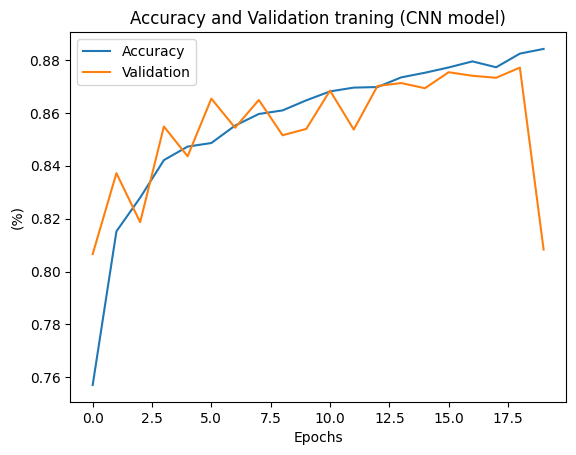

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy and Validation traning (CNN model)')
plt.xlabel('Epochs')
plt.ylabel('(%)')
plt.legend(['Accuracy', 'Validation'])
plt.show()

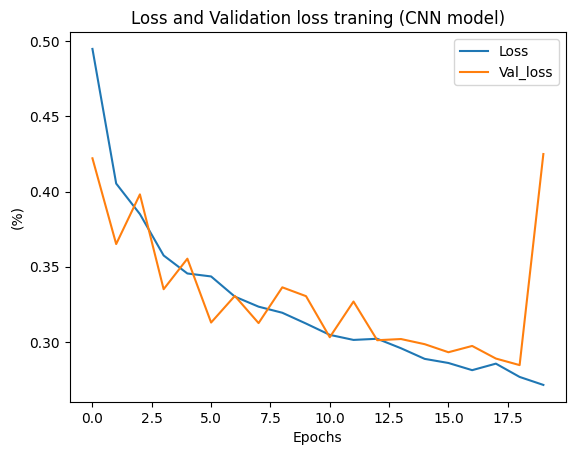

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss and Validation loss traning (CNN model)')
plt.xlabel('Epochs')
plt.ylabel('(%)')
plt.legend(['Loss', 'Val_loss'])
plt.show()